In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

try:
    # Reading the data from a CSV file into a pandas DataFrame
    df_avec_successful = pd.read_csv('../Datasets/movies_cleaned_dataset.csv')
except FileNotFoundError as e:
    print(f"File not found: {e}")
    # Handle the exception (e.g., exit the script or log an error)
    exit()

# Filling missing values for specific columns with their mean
columns_to_fill = ['Inflation_adjusted_profit', 'averageRating', 'Oscar_Wins', 'Nominations']
for column in columns_to_fill:
    df_avec_successful[column].fillna(df_avec_successful[column].mean(), inplace=True)

# Capping extreme values in 'Inflation adjusted profit' to reduce outlier impact
# This reduces the impact of outliers by setting a threshold (90th percentile here)
# Values above this threshold are set to the threshold value itself
cap_threshold = df_avec_successful['Inflation_adjusted_profit'].quantile(0.90)
df_avec_successful['capped_profit'] = df_avec_successful['Inflation_adjusted_profit'].clip(upper=cap_threshold)

# Standardizing selected features (z-score normalization)
z_features = {
    'capped_profit': zscore(df_avec_successful['capped_profit']),
    'averageRating': zscore(df_avec_successful['averageRating']),
    'Oscar_Wins': zscore(df_avec_successful['Oscar_Wins']),
    'Nominations': zscore(df_avec_successful['Nominations'])
}

# Assigning weights to standardized features
weights = {
    'capped_profit': 0.3,
    'averageRating': 0.35,
    'Oscar_Wins': 0.175,
    'Nominations': 0.175
}

# Calculating a composite 'Successful' score using weighted features
df_avec_successful['Successful'] = sum(weights[feature] * z_features[feature] for feature in weights)

# Normalizing the 'Successful' score to a 0-10 scale for interpretability
min_score = df_avec_successful['Successful'].min()
max_score = df_avec_successful['Successful'].max()
df_avec_successful['Successful'] = round((df_avec_successful['Successful'] - min_score) / (max_score - min_score) * 10, 1)

# Sorting the DataFrame by 'Successful' score in descending order
df_avec_successful.sort_values(by='Successful', ascending=False, inplace=True)

# Display the top 300 rows
df_avec_successful.head(300)


,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_genres,Main_genre,Main_language,Top_genres,Main_country,Main_continent,Plot_summary,...,Estimated_Budget,IMDb,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit,nconst,Director_name,capped_profit,Successful
11509,Titanic,2185372302,194.0,"{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...","['Tragedy', 'Costume drama', 'Historical ficti...",Multilingual,Action/Adventure,United States of America,USA,"In 1996, treasure hunter Brock Lovett and his...",...,200000000,tt0120338,11,14,1985372302,2.928104e+09,nm0000116,James Cameron,1.160929e+07,10.0
41728,The Lord of the Rings: The Return of the King,1119929521,250.0,"{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...","['Fantasy Adventure', 'Adventure', 'Epic', 'Ac...",Multilingual,Action/Adventure,United States of America,NaN,"Gandalf, Aragorn, Legolas, Gimli, Théoden, Ga...",...,94000000,tt0167260,11,11,1025929521,1.320270e+09,nm0001392,Peter Jackson,1.160929e+07,9.9
12347,Ben-Hur,146900000,219.0,"{""/m/03g3w"": ""History"", ""/m/02l7c8"": ""Romance ...","['History', 'Romance Film', 'Action', 'Drama',...",English Language,Action/Adventure,United States of America,USA,"In AD 26, Judah Ben-Hur is a wealthy prince a...",...,15000000,tt0052618,11,12,131900000,1.071201e+09,nm0943758,William Wyler,1.160929e+07,9.8
13786,West Side Story,43700000,152.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/04t36"": ""Mus...","['Crime Fiction', 'Musical', 'Drama', 'Romance...",Multilingual,Family,United States of America,USA,Although the plot summary here is divided into...,...,6000000,tt0055614,10,11,37700000,2.985766e+08,nm0730385,Jerome Robbins,1.160929e+07,9.3
19556,Gone with the Wind,400000000,234.0,"{""/m/060__y"": ""Film adaptation"", ""/m/04xvh5"": ...","['Film adaptation', 'Costume drama', 'Roadshow...",English Language,Drama,United States of America,USA,The film opens on a large cotton plantation c...,...,4000000,tt0031381,8,13,396000000,6.740385e+09,nm0281808,Victor Fleming,1.160929e+07,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16366,Speed,350448145,115.0,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...","['Thriller', 'Action/Adventure', 'Action', 'Cr...",Multilingual,Drama,United States of America,USA,An unidentified man traps several businesspeo...,...,30000000,tt0111257,2,3,320448145,5.118007e+08,nm0000957,Jan de Bont,1.160929e+07,5.9
12229,Star Trek,385494555,126.0,"{""/m/023pxm"": ""Reboot"", ""/m/06n90"": ""Science F...","['Reboot', 'Science Fiction', 'Action', 'Adven...",English Language,Fiction,United States of America,NaN,"In 2233, the Federation starship USS Kelvin i...",...,150000000,tt0796366,1,4,235494555,2.598623e+08,nm0009190,J.J. Abrams,1.160929e+07,5.9
28846,Capote,49233161,98.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/017fp"": ""Bio...","['Crime Fiction', 'Biography', 'Crime Drama', ...",English Language,Drama,United States of America,NaN,The film opens in Kansas with the discovery of...,...,7000000,tt0379725,1,5,42233161,5.119582e+07,nm0587955,Bennett Miller,1.160929e+07,5.9
33499,The Help,211608112,145.0,"{""/m/07s9rl0"": ""Drama"", ""/m/04xvlr"": ""Period p...","['Drama', 'Period piece', 'Comedy-drama']",English Language,Drama,United States of America,NaN,Aibileen Clark is a middle-aged black maid wh...,...,25000000,tt1454029,1,4,186608112,1.963948e+08,nm0853238,Tate Taylor,1.160929e+07,5.9


In [2]:
df_avec_successful.describe() 

,Movie_box_office_revenue,Movie_runtime,Release_Date,averageRating,numVotes,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit,capped_profit,Successful
count,4.215500e+04,3.554400e+04,42155.000000,42155.000000,2.643600e+04,4.215500e+04,42155.000000,42155.000000,4.215500e+04,4.215500e+04,4.215500e+04,42155.00000
mean,9.309064e+06,1.285770e+02,1860.930376,6.268028,2.380605e+04,3.230446e+06,0.031693,0.078947,6.078617e+06,1.160929e+07,9.680834e+05,4.53741
std,5.334529e+07,5.724356e+03,478.466297,0.867840,9.685211e+04,1.477468e+07,0.326571,0.736461,4.449285e+07,8.851471e+07,9.150590e+06,0.33163
min,0.000000e+00,3.000000e-01,0.000000,1.200000,5.000000e+00,0.000000e+00,0.000000,0.000000,-2.250000e+08,-2.739096e+08,-2.739096e+08,0.00000
25%,0.000000e+00,8.600000e+01,1959.000000,6.200000,3.350000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.50000
50%,0.000000e+00,9.600000e+01,1990.000000,6.268028,1.483000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.50000
75%,0.000000e+00,1.100000e+02,2005.000000,6.600000,7.910250e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.70000
max,2.782275e+09,1.079281e+06,2014.000000,9.800000,2.816055e+06,3.800000e+08,11.000000,14.000000,2.545275e+09,6.822472e+09,1.160929e+07,10.00000


In [3]:
def get_transformer_feature_names(column_transformer):
    """
    Get feature names from a fitted ColumnTransformer.
    """
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            # If the remainder is a passthrough, its feature names are the same as the column names
            if pipe == 'passthrough':
                output_features.extend(features)
            continue

        # For transformers with a get_feature_names_out method
        if hasattr(pipe, 'get_feature_names_out'):
            transformer_features = pipe.get_feature_names_out(features)
        else:
            transformer_features = features

        output_features.extend(transformer_features)

    return output_features

ML

In [5]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

data = df_avec_successful
X = data.drop('Successful', axis=1)
y = data['Successful']  # target

#preprocessing steps for both categorical and numeric data. Categorical features are filled with a
#placeholder value for any missing data and then one-hot encoded. Numeric features are imputed with their
#mean and then standardized. This transformed data is then used to train the RandomForestRegressor.
#Make sure to adjust the categorical_columns and numeric_columns lists to include all relevant features from your dataset.
#Selecting categorical and numeric columns

categorical_columns = ['Main_language', 'Main_country']  
numeric_columns = ['Movie_runtime']  

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # standardizing data
])

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

# Get a list of unique genres
top_genres = data['Top_genres'].value_counts().index
print(top_genres)
print(data['Top_genres'].value_counts())

#OPTIMISATION

# Hyperparameters grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
# Hyperparameters grid for CatBoost
param_grid_catboost = {
    'classifier__iterations': [100, 500, 1000],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__depth': [4, 6, 10],
}
# Analysis for each genre
for genre in top_genres:
    print("------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------")
    print(f"Analyzing genre: {genre} - Data Points: {len(data[data['Top_genres'] == genre])}")

    genre_data = data[data['Top_genres'] == genre]
    # Filter movies with success score greater than 6

    successful_movies = genre_data[genre_data['Successful'] >= 6]
    successful_movies['Movie_runtime'] = pd.to_numeric(successful_movies['Movie_runtime'], errors='coerce')
    mean_runtime = successful_movies['Movie_runtime'].dropna().mean()
    print(f"Optimal Runtime: {mean_runtime:.2f} minutes")

    try:
        X_genre = genre_data[categorical_columns]
        y_genre = genre_data['Successful']
        X_train, X_test, y_train, y_test = train_test_split(X_genre, y_genre, test_size=0.1, random_state=42)

        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', CatBoostRegressor(random_state=42, verbose=0))])

        # Grid search for hyperparameter tuning
        grid_search = GridSearchCV(clf, param_grid_catboost, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        # Best model after grid search
        best_clf = grid_search.best_estimator_

        # Predict and evaluate
        y_pred = best_clf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_test, y_pred)

        print(f"MSE: {mse}, RMSE: {rmse}, R²: {r2}")

        # Feature Importance Analysis
        feature_importances = best_clf.named_steps['classifier'].feature_importances_
        column_transformer = best_clf.named_steps['preprocessor']
        feature_names = get_transformer_feature_names(column_transformer)
       
        # Ensure the number of feature names matches the number of feature importances
        if len(feature_names) == len(feature_importances):
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

            # Extracting and displaying top features excluding 'Main_language_missing'
            top_languages1 = sorted_feature_importance[~sorted_feature_importance['Feature'].str.contains('Main_language_missing')]
            top_languages = top_languages1[top_languages1['Feature'].str.contains('Main_language_')].head(6)
            countries= sorted_feature_importance[sorted_feature_importance['Feature'].str.contains('Main_country_')]
            top_countries = countries[~countries['Feature'].str.contains('missing')].head(5)
            # = sorted_feature_importance[sorted_feature_importance['Feature'].str.contains('Main_country_')].head(4)

            print(f"Top 4 Languages for {genre}:\n{top_languages}")
            print(f"Top 4 Countries for {genre}:\n{top_countries}")
        else:
            print("Number of feature names and feature importances do not match.")

        import plotly.express as px
        import plotly.offline as pyo
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        import mpld3

        # List of countries to highlight
        def clean_country_name(country_name):
            cleaned_name = country_name.replace("Main_country_", "").replace(" of America", "")
            return cleaned_name

        # Apply the function to each element in the list
        cleaned_countries = [clean_country_name(country) for country in top_countries['Feature']]
        # Generate a unique color for each country
        colors = px.colors.qualitative.Plotly  # This is a list of colors provided by Plotly

        # Ensure there are enough colors for all countries
        assert len(colors) >= len(cleaned_countries), "Not enough colors available."

        # Create a DataFrame
        df = pd.DataFrame({
            'color': cleaned_countries,
            'country': cleaned_countries  # Use country names as color identifiers for now
        })

        # Create a color mapping: each country gets a different color
        color_mapping = {country: colors[i] for i, country in enumerate(cleaned_countries)}

        # Create the interactive world map
        fig = px.choropleth(df,
                            locations='color',
                            locationmode='country names',
                            color='country',
                            hover_name='color',
                            color_discrete_map=color_mapping,  # Use the color mapping
                            title='Top 5 recommended release country')

        # Show the figure
        fig.show()
        # Save the figure to an HTML file
        if genre == 'Action/Adventure':
            pyo.plot(fig, filename=f'catboost_info/mapactionadventure.html', auto_open=False)
        else:
            pyo.plot(fig, filename=f'catboost_info/map_{genre}.html', auto_open=False)

        # Create a beautiful bar plot    
        # Create a bar plot using Plotly Express
        
        top_languages['Feature'] = top_languages['Feature'].str.replace('Main_language_', '')
        top_languages['Feature'] = top_languages['Feature'].str.replace('Language', '')

        fig2 = px.bar(top_languages.head(5),
                    x='Importance', 
                    y='Feature',
                    title='Top 5 Important Language',
                    labels={'Importance': 'Language Importance', 'Feature': 'Languages'},
                    orientation='h',  # Horizontal bar plot
                    color='Importance',  # Color the bars by the 'Importance' value
                    color_continuous_scale='viridis')  # Use the 'viridis' color scale

        # Update layout for better readability
        fig2.update_layout(
            xaxis_title='Language Importance',
            yaxis_title='Languages',
            title_font_size=15,
            xaxis_tickangle=45
        )

        # Show the plot
        fig2.show()

        if genre == 'Action/Adventure':
            pyo.plot(fig2, filename=f'catboost_info/maplangueactionadventure.html', auto_open=False)


        else:
            pyo.plot(fig2, filename=f'catboost_info/maplangue_{genre}.html', auto_open=False)

    except Exception as e:
        print(f"An error occurred while analyzing genre {genre}: {e}")

Index(['Drama', 'Other', 'Family', 'Action/Adventure', 'Horror', 'Fiction'], dtype='object', name='Top_genres')
Top_genres
Drama               16115
Other               13334
Family               6265
Action/Adventure     3544
Horror               1554
Fiction              1343
Name: count, dtype: int64
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Analyzing genre: Drama - Data Points: 16115
Optimal Runtime: 177.77 minutes


/var/folders/dy/f0mg1zg17mz3xf4qc516zzj80000gn/T/ipykernel_5548/2187594812.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_movies['Movie_runtime'] = pd.to_numeric(successful_movies['Movie_runtime'], errors='coerce')


MSE: 0.14296481470156197, RMSE: 0.378106882642411, R²: 0.034469731152307004
Top 4 Languages for Drama:
                             Feature  Importance
46        Main_language_Multilingual   50.494923
28      Main_language_Hindi Language    3.042442
20    Main_language_English Language    2.993256
35   Main_language_Japanese Language    1.601940
64   Main_language_Standard Mandarin    1.450680
42  Main_language_Malayalam Language    0.442829
Top 4 Countries for Drama:
                                    Feature  Importance
179  Main_country_ United States of America   17.171030
121                     Main_country_ India    4.536187
178            Main_country_ United Kingdom    3.544076
94                     Main_country_ Canada    0.939381
118                 Main_country_ Hong Kong    0.797228


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Analyzing genre: Other - Data Points: 13334
Optimal Runtime: 82.78 minutes


/var/folders/dy/f0mg1zg17mz3xf4qc516zzj80000gn/T/ipykernel_5548/2187594812.py:89: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyboardInterrupt: 

cast : find best profile for each of the top 4 roles (sex, number of movies played in, age)
In the code below we trained XGB(boosted trees) model such that it can predicts success rate based on thses features 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import random

pd.options.mode.chained_assignment = None  # default='warn'

def load_data(filepath):
    """
    Load dataset from a specified filepath.
    """
    try:
        df = pd.read_csv(filepath)
        return df
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return None

def preprocess_data(df,genre):
    """
    Preprocess the dataset: drop missing values, filter by 'Successful' column,
    calculate actors' ages, and encode categorical data. Only keep a specified Genre.
    """
    df.dropna(inplace=True)
    df = df[df['Top_genres'] == genre]

    #df = df[df['Successful'] >= 7.5]

    df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%Y')


    # Ensure that birth year columns are numeric
    for role in ['role_1', 'role_2', 'role_3', 'role_4']:
        birth_year_column = f'{role}_birth_year'
        df[birth_year_column] = pd.to_numeric(df[birth_year_column], errors='coerce')
        #we use pd.to_numeric with errors='coerce' to convert the birth year columns to numeric types

    # Calculating ages of actors from their birth year and movie release year
    df['role_1_age'] = df['Release_Date'].dt.year - df['role_1_birth_year']
    df['role_2_age'] = df['Release_Date'].dt.year - df['role_2_birth_year']
    df['role_3_age'] = df['Release_Date'].dt.year - df['role_3_birth_year']
    df['role_4_age'] = df['Release_Date'].dt.year - df['role_4_birth_year']

    # Encoding categorical data
    label_encoder = LabelEncoder()
    for role in ['role_1_sex', 'role_2_sex', 'role_3_sex', 'role_4_sex']:
        df[role] = label_encoder.fit_transform(df[role].astype(str))

    return df


def feature_selection(df):
    """
    Select and return features and target variable from the dataframe.
    """
    features = df[['role_1_age', 'role_2_age', 'role_3_age', 'role_4_age',
                   'role_1_roles_count', 'role_2_roles_count', 
                   'role_3_roles_count', 'role_4_roles_count',
                   'role_1_sex', 'role_2_sex', 'role_3_sex', 'role_4_sex']]
    target = df['Successful']

    # Align features and target by index to ensure they match
    features.dropna(inplace=True)
    target = target.loc[features.index]

    return features, target

def train_model(X_train, y_train):
    """
    Train the model using GridSearchCV with XGBoost.
    """
    param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2]
    }
    param_grid2 = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 2, 3],
        'subsample': [0.7, 0.8, 0.9]
    }

    xgb = XGBRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid2, 
                           cv=3, n_jobs=-1, verbose=0, 
                           scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model on the test set and return the MSE and R² score.
    """
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

def feature_importance(model, features):
    """
    Generate a DataFrame of feature importances.
    """
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
    return importance_df.sort_values(by='Importance', ascending=False)

########################################################################################################################
#Purpose of the random search algorithm below is to find best combination of feature that maximisze success rate based on the importance of the parameters find above

def convert_profile_to_model_input(profile):
    # Convert the profile dictionary to a list or array in the order expected by the model
    # This function needs to be defined based on how your model expects the input
    # For example:
    model_input = []
    for role, features in profile.items():
        model_input.append(features['age'])
        model_input.append(features['roles_count'])
        model_input.append(1 if features['sex'] == 'M' else 0)  # Assuming sex is binary and encoded as 1/0
    return model_input

def optimize_profiles(model, initial_guess, iterations=1000):
    """
    Optimizes actor profiles to achieve the best success rate predicted by the model.
    
    Args:
    model: Trained machine learning model used for prediction.
    initial_guess: Initial guess of the profiles.
    iterations: Number of iterations for the optimization process.
    
    Returns:
    Tuple of the best profile and its corresponding success rate.
    """
    best_profile = initial_guess.copy()
    best_score = -np.inf

    for _ in range(iterations):
        current_profile = best_profile.copy()

        # Randomly adjust one parameter in one of the roles
        role_to_adjust = random.choice(list(current_profile.keys()))
        feature_to_adjust = random.choice(list(current_profile[role_to_adjust].keys()))

        if feature_to_adjust == 'age':
            current_profile[role_to_adjust]['age'] = random.choice(age_range)
        elif feature_to_adjust == 'roles_count':
            current_profile[role_to_adjust]['roles_count'] = random.choice(role_count_range)
        elif feature_to_adjust == 'sex':
            current_profile[role_to_adjust]['sex'] = random.choice(sex_range)

        # Convert the current profile for model input and predict success rate
        model_input = convert_profile_to_model_input(current_profile)
        success_rate = model.predict([model_input])[0]

        # Update best profile if current is better
        if success_rate > best_score:
            best_score = success_rate
            best_profile = current_profile

    return best_profile, best_score

########################################################################################################################

def find_best_match(df, optimized_profile):
    """
    Finds the best matching actors for the given optimized profile.(Remove dead actors from the dataset)
    
    Args:
    df: DataFrame containing actor information.
    optimized_profile: Dictionary of the optimized profiles.
    
    Returns:
    Dictionary of best matching actors for each role.
    """
    matches = {}
   
    for role in ['role_1', 'role_2', 'role_3', 'role_4']:
        # Convert birth year to numeric and calculate age
        df[f'{role}_birth_year'] = pd.to_numeric(df[f'{role}_birth_year'], errors='coerce')
        df[f'{role}_birth_year'].fillna(df[f'{role}_birth_year'].median(), inplace=True)
        valid_rows = df[f'{role}_birth_year'].notna()
        df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%Y')

        df.loc[valid_rows, f'{role}_age'] = df.loc[valid_rows, 'Release_Date'].dt.year - df.loc[valid_rows, f'{role}_birth_year']

        # Calculate differences and score
        df['diff_age'] = abs(df[f'{role}_age'] - optimized_profile[role]['age'])
        df['diff_count'] = abs(df[f'{role}_roles_count'] - optimized_profile[role]['roles_count'])
        df['diff_sex'] = (df[f'{role}_sex'] != optimized_profile[role]['sex'])
        df['score'] = df['diff_age'] + df['diff_count'] + df['diff_sex']

        top_matches = df.loc[valid_rows].sort_values(by='score').head(6)
        matches[role] = top_matches[role].tolist()

    return matches

def get_actor_names(nconst_lists, cast_df):
    """
    Retrieves actor names corresponding to the nconst values for each role. 
    If the primary choice (first nconst) leads to an IndexError, it tries the secondary choice, and so on.
    
    Args:
    nconst_lists: Dictionary of lists of nconst values for actors for each role.
    cast_df: DataFrame containing cast names and nconst.
    
    Returns:
    Dictionary of actor names for each role.
    """
    actor_names = {}
    for role, nconsts in nconst_lists.items():
        for nconst in nconsts:
            try:
                actor_name = cast_df.loc[cast_df['nconst'] == nconst, 'primaryName'].values[0]
                actor_names[role] = actor_name
                break  # Exit the loop once a valid name is found
            except IndexError:
                continue  # Try the next nconst in the list if there was an IndexError
        if role not in actor_names:
            actor_names[role] = 'Unknown Actor'  # Set to 'Unknown Actor' if all nconsts lead to an IndexError

    return actor_names


# Main execution
if __name__ == "__main__":
    filepath = '../Datasets/cast_processed_all_genres.csv'
    df = load_data(filepath)
    Result = {}

    if df is not None:
        Top_Genre =['Drama','Other','Family', 'Action/Adventure', 'Horror', 'Fiction']
        for genre in Top_Genre:
            print('')

            
            print(f"Analyzing genre: {genre} - Data Points: {len(df[df['Top_genres'] == genre])}")

            ######ﬁ#############################################################################################################
            ######ﬁ###################### XGB to understand importance of each features ########################################
            ######ﬁ#############################################################################################################
            
            df_processed = preprocess_data(df,genre)
            features, target = feature_selection(df_processed)

            # Splitting the dataset
            X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

            # Feature scaling
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Model training
            best_model = train_model(X_train_scaled, y_train)

            # Model evaluation
            mse_best, r2_best = evaluate_model(best_model, X_test_scaled, y_test)
            print(f"Optimized XGBoost MSE: {mse_best}, R²: {r2_best}")

            # Feature importance
            importance_df = feature_importance(best_model, features)

            # Print out the result
            roles = ['role_1', 'role_2', 'role_3', 'role_4']
            profiles = {}

            for role in roles:
                role_features = importance_df[importance_df['Feature'].str.startswith(role)]
                profiles[role] = role_features.sort_values(by='Importance', ascending=False)

            for role, profile in profiles.items():
                print(f"{role} Profile:")
                print(profile)
                print()

            ######ﬁ#############################################################################################################
            ######ﬁ################ find best combination of feature that maximisze success rate ###############################
            ######ﬁ#############################################################################################################

            #Purpose of the random search algorithm below is to find best combination of feature that maximisze success
            #rate based on the importance of the parameters found

            # Define the range of values and initial guesses
            age_range = range(10, 90)  # Age from 10 to 90
            role_count_range = range(1, 150)  # Role count from 1 to 150
            sex_range = ['M', 'F']  # Male and Female

            initial_guess = {
                'role_1': {'age': 0, 'roles_count': 0, 'sex': 'M'},
                'role_2': {'age': 0, 'roles_count': 0, 'sex': 'M'},
                'role_3': {'age': 0, 'roles_count': 0, 'sex': 'M'},
                'role_4': {'age': 0, 'roles_count': 0, 'sex': 'M'}
            }

            optimized_profile, optimized_score = optimize_profiles(best_model, initial_guess, iterations=5000)
            print("Optimized Profile:", optimized_profile)

            ####################################################################################################################
            ##################### Looking for the best match in the database in order to find Actors ###########################
            ####################################################################################################################

            try:
                
                cast_name_df = pd.read_csv('../Datasets/names.tsv', on_bad_lines='skip', delimiter='\t', encoding='utf-8')
                living_actors_df = cast_name_df[cast_name_df['deathYear'] == '\\N']
                actor_names = get_actor_names(find_best_match(df_processed, optimized_profile), living_actors_df)
                print("Best Actors:", actor_names)
            except FileNotFoundError as e:
                print(f"File not found: {e}")

            Result[genre] = actor_names


        print(Result)


Analyzing genre: Drama - Data Points: 10812
Optimized XGBoost MSE: 0.2386709243251111, R²: 0.00027891570745819383
role_1 Profile:
              Feature  Importance
4  role_1_roles_count    0.089716
0          role_1_age    0.078113
8          role_1_sex    0.075845

role_2 Profile:
              Feature  Importance
5  role_2_roles_count    0.092475
1          role_2_age    0.085851
9          role_2_sex    0.062427

role_3 Profile:
               Feature  Importance
6   role_3_roles_count    0.126552
2           role_3_age    0.084068
10          role_3_sex    0.043660

role_4 Profile:
               Feature  Importance
11          role_4_sex    0.093067
7   role_4_roles_count    0.086023
3           role_4_age    0.082203

Optimized Profile: {'role_1': {'age': 27, 'roles_count': 143, 'sex': 'F'}, 'role_2': {'age': 83, 'roles_count': 99, 'sex': 'M'}, 'role_3': {'age': 18, 'roles_count': 12, 'sex': 'M'}, 'role_4': {'age': 33, 'roles_count': 63, 'sex': 'M'}}
Best Actors: {'role_1': 'Joh

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Analysis

Director : Find best profil based on the number of movies and the Director age 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Setting pandas option to avoid warning
pd.options.mode.chained_assignment = None

# Function to read data from CSV file
def read_data(file_path):
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None

# Load the data
df = read_data('../Datasets/director_processed.csv')
if df is None:
    raise Exception("Data file not found. Please check the file path.")

# Select relevant columns and drop rows with missing values
relevant_columns = df[['num_movies', 'Director_age', 'Successful']].dropna()

# Split the data into features (X) and target (y)
X = relevant_columns[['num_movies', 'Director_age']]
y = relevant_columns['Successful']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse}, R²: {r2}")
    return model

# Train and evaluate Linear Regression and Random Forest models
linear_model = train_evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test)
rf_model = train_evaluate_model(RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test)

# Function to find the optimal combination of movies and age
def find_optimal_combination(model, age_range, movies_range):
    best_score = -np.inf
    best_combination = (0, 0)
    for age in age_range:
        for movies in movies_range:
            predicted_success = model.predict([[movies, age]])[0]
            if predicted_success > best_score:
                best_score = predicted_success
                best_combination = (movies, age)
    return best_combination, best_score

# Finding the optimal combination
age_range = np.arange(20, 80)
movies_range = np.arange(1, 100)
best_combination, best_score = find_optimal_combination(rf_model, age_range, movies_range)
print(f"Optimal number of movies: {best_combination[0]}, Optimal age: {best_combination[1]}, Predicted Success Score: {best_score}")

# Function to calculate similarity
def calculate_similarity(num_movies, director_age, optimal_num_movies, optimal_director_age):
    return 1 / (abs(num_movies - optimal_num_movies) + abs(director_age - optimal_director_age) + 1)

# Add similarity score to the DataFrame
df['similarity_score'] = df.apply(lambda row: calculate_similarity(row['num_movies'], row['Director_age'], *best_combination), axis=1)

# Sort and display top 5 directors
sorted_directors = df.sort_values(by='similarity_score', ascending=False)
top_5_directors = sorted_directors.head(5)
print(top_5_directors[['Director_name', 'num_movies', 'Director_age', 'similarity_score']])

# Load the second DataFrame to filter directors based on their alive status
df1 = read_data('../Datasets/directors.csv')
if df1 is None:
    raise Exception("Second data file not found. Please check the file path.")

# Filter directors who are alive and in the top 5 list
alive_directors = df1[df1['death_year'] == '\\N']['director_name']
filtered_directors = top_5_directors[top_5_directors['Director_name'].isin(alive_directors)]
filtered_directors_list = filtered_directors['Director_name'].tolist()
print(filtered_directors_list)


Model: LinearRegression, MSE: 0.2632200098858688, R²: 0.0005518887901475589
Model: RandomForestRegressor, MSE: 0.32060993839445673, R²: -0.21735804775018996


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: U

Optimal number of movies: 68, Optimal age: 49, Predicted Success Score: 6.907776190476199
          Director_name  num_movies  Director_age  similarity_score
6773        John Madden          68            49               1.0
8054        James Keach          68            48               0.5
7066    S.P. Muthuraman          67            49               0.5
5114  Henrik Ruben Genz          67            49               0.5
3796        Lino Brocka          69            49               0.5
['John Madden', 'James Keach', 'S.P. Muthuraman', 'Henrik Ruben Genz']


Analysis 

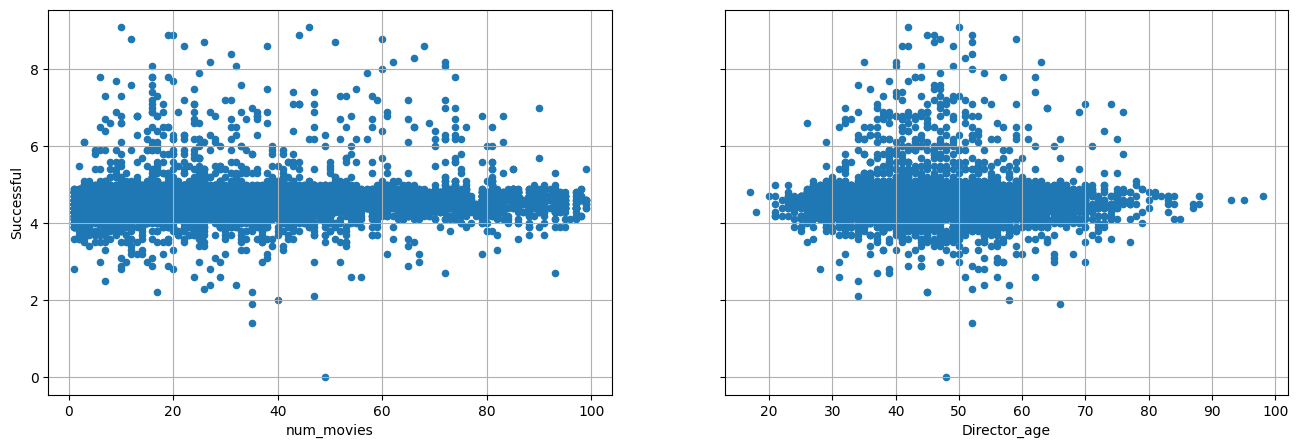

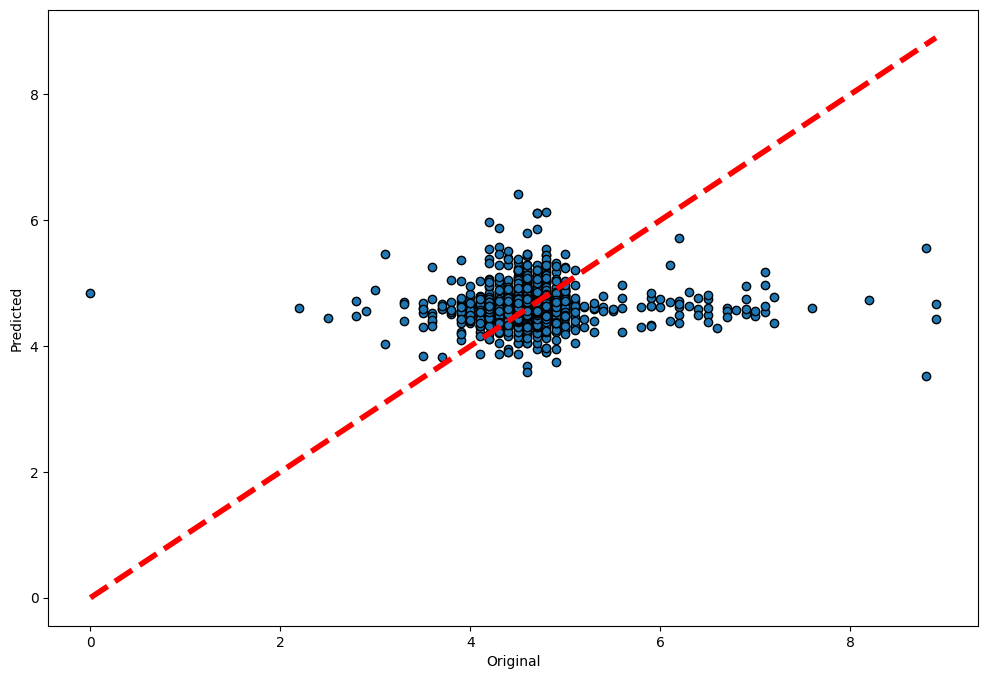

Mean Squared Error (MSE): 0.32060993839445673
Root Mean Squared Error (RMSE): 0.5662242827665172
Mean Absolute Error (MAE): 0.3396745219852094
R-squared (R²): -0.21735804775018996

Feature Importances:
num_movies: 0.5052764837069246
Director_age: 0.49472351629307537


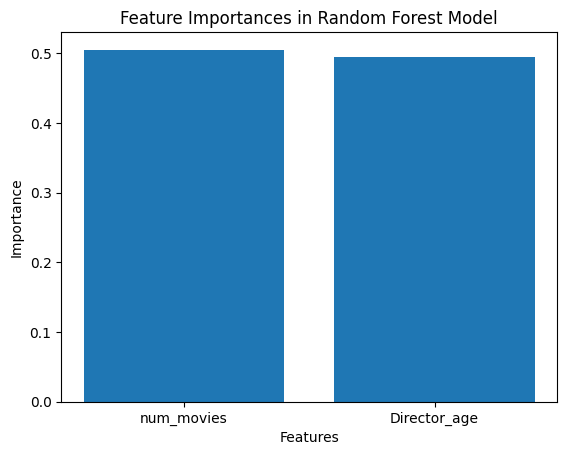

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df, X_train, X_test, y_train, y_test, and rf_model are already defined and available from the previous code

# 1. Visualize the Relationship Between Features and Response
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 5))
df.plot(kind='scatter', x='num_movies', y='Successful', ax=axs[0], grid=True)
df.plot(kind='scatter', x='Director_age', y='Successful', ax=axs[1], grid=True)

# 2. Visualize Original vs Predicted Values
y_pred_rf = rf_model.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

# 3. Evaluate the Random Forest model using R-squared and Mean Squared Error (MSE)
from sklearn.metrics import mean_absolute_error

# Assuming y_test (actual values) and y_pred_rf (predicted values by Random Forest) are available

# Compute Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Compute Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)

# Compute Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Compute R-squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the computed metrics
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")

# Feature Importance
feature_importances = rf_model.feature_importances_

# Print Feature Importances
print("\nFeature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")



# 4. Visualize Feature Importance from Random Forest
feature_importances = rf_model.feature_importances_
features = X_train.columns
fig, ax = plt.subplots()
ax.bar(features, feature_importances)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances in Random Forest Model')
plt.show()

